In [11]:
import torch
from src.utils.eval import create_grid, eval_kde_on_grid, eval_dist_on_grid, visualize_vals_on_grid_2d, visualize_samples_2d, compute_jsd, normalize_vals

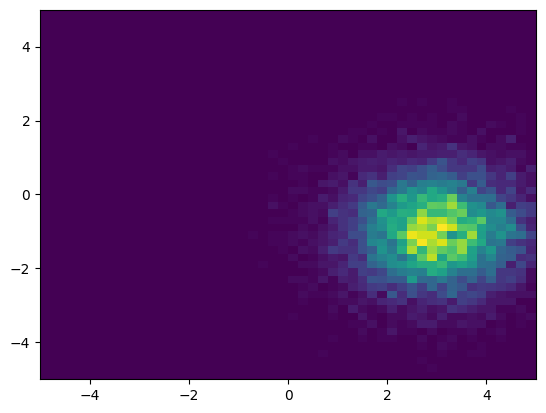

In [12]:
mins = [-5, -5]
maxs = [5, 5]
num = 100

grid = create_grid(mins, maxs, num)

q = torch.distributions.Normal(
    torch.tensor([3, -1], dtype=torch.float), 
    torch.ones(2, dtype=torch.float)
)

q_samples = q.sample((10000,))

visualize_samples_2d(q_samples)

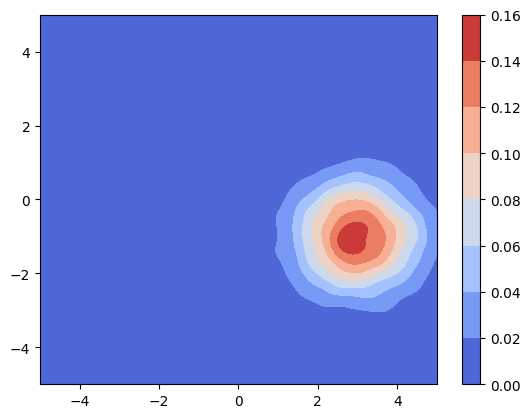

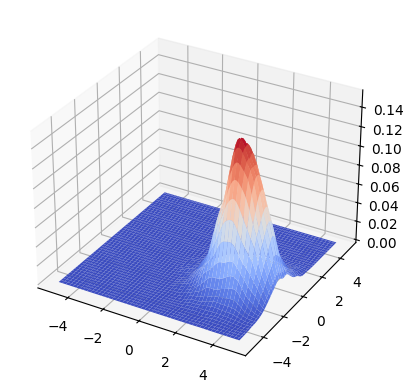

In [13]:
q_vals = eval_kde_on_grid(grid, q_samples)
visualize_vals_on_grid_2d(grid, q_vals)

0.9603608168162794


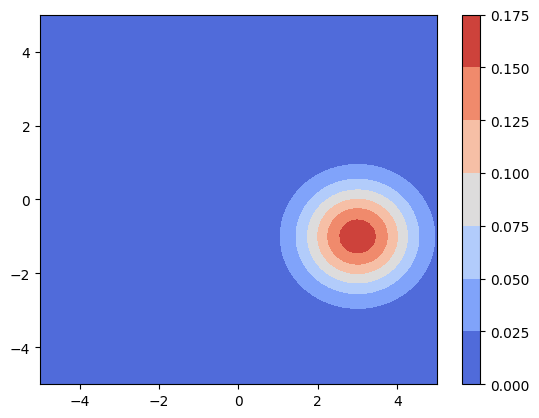

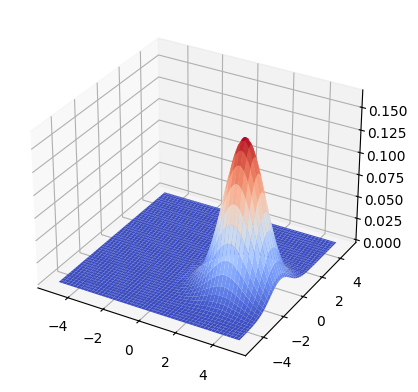

In [14]:
p_vals = eval_dist_on_grid(grid, q)
p_vals = normalize_vals(p_vals, mins, maxs, num)
visualize_vals_on_grid_2d(grid, p_vals)

In [15]:
jsd = compute_jsd(p_vals, q_vals)
print(jsd)

0.11149044287109182
